# Proyek Analisis Data: **Bike Sharing Dataset**
- **Nama:** Ria Amelia Shinta Putricia Hendra
- **Email:** riaptrcia@gmail.com
- **ID Dicoding:** riaamelia

##Introduction

Dalam proyek ini, kami bertujuan untuk menganalisis data penggunaan layanan berbagi sepeda. Tujuannya adalah untuk mengidentifikasi pola-pola yang memengaruhi jumlah penyewaan sepeda, baik berdasarkan faktor cuaca, waktu, maupun kondisi hari (hari kerja atau hari libur).

-------
##Introduction

In this project, we aim to analyze the bike-sharing service usage data. The goal is to identify patterns that influence the number of bike rentals, considering factors like weather, time, and the day type (weekday or holiday).


## Menentukan Pertanyaan Bisnis

- **Pertanyaan 1** :

    ***Faktor cuaca dan waktu mana yang paling signifikan mempengaruhi jumlah penyewaan sepeda?***
 - Analisis ini bertujuan untuk memahami bagaimana variasi cuaca (seperti cerah, mendung, hujan) serta jam dalam sehari dapat memengaruhi jumlah penyewaan sepeda. Dengan memahami hal ini, operator layanan berbagi sepeda dapat mengoptimalkan persediaan sepeda pada waktu dan kondisi tertentu.

- **Pertanyaan 2**:

    ***Apakah ada perbedaan pola penyewaan sepeda berdasarkan musim dan hari (hari kerja vs hari libur)?***
    - Analisis ini berfokus untuk mengeksplorasi apakah pengguna lebih cenderung menyewa sepeda pada musim tertentu atau pada hari-hari tertentu (seperti akhir pekan atau hari kerja), sehingga dapat membantu dalam perencanaan logistik dan strategi pemasaran.
------------
- **Question 1:**

    ***Which weather conditions and times of day most significantly influence bike rental volumes?***
 - This analysis aims to understand how variations in weather (such as sunny, cloudy, or rainy) and specific hours of the day affect the number of bike rentals. By understanding this, bike-sharing operators can better optimize the availability of bikes during particular times and weather conditions.

- **Question 2:**

    **Are there differences in bike rental patterns based on seasons and day type (workdays vs holidays)?**
    - This analysis focuses on exploring whether users are more likely to rent bikes during specific seasons or on certain days (such as weekends or workdays), which can help with logistics planning and marketing strategies.

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import ttest_ind
import requests
import numpy as np
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
!pip install streamlit


## Data Wrangling

### Gathering Data

In [ ]:
# Fungsi untuk mendownload file dari Google Drive
def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"
    session = requests.Session()
    response = session.get(URL, params={'id': id}, stream=True)
    token = get_confirm_token(response)
    if token:
        params = {'id': id, 'confirm': token}
        response = session.get(URL, params=params, stream=True)
    save_response_content(response, destination)

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value
    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768
    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk:
                f.write(chunk)

# Fungsi untuk mengakses dataset dari Google Drive
def load_data_from_gdrive():
    try:
        # ID file dari Google Drive
        day_file_id = '1QE1baqT-k2dt4mzrLi6WHou6YuYigQB9'
        hour_file_id = '1BQWbPKqHUY12IA-o7R-hTSkknFpohWlM'

        # Download file ke lokal
        download_file_from_google_drive(day_file_id, 'day.csv')
        download_file_from_google_drive(hour_file_id, 'hour.csv')

        # Baca file CSV dari lokal
        day_df = pd.read_csv('day.csv')
        hour_df = pd.read_csv('hour.csv')
        return day_df, hour_df
    except Exception as e:
        print("Tidak bisa mengakses data dari Google Drive. Beralih ke data offline.")
        return load_data_offline()

# Fungsi untuk mengakses dataset secara offline
def load_data_offline():
    try:
        day_df = pd.read_csv('day.csv')
        hour_df = pd.read_csv('hour.csv')
        return day_df, hour_df
    except Exception as e:
        print("Gagal memuat dataset lokal. Pastikan file lokal tersedia.")

# Mengimpor dataset tanpa streamlit caching
def load_data():
    return load_data_from_gdrive()

# Panggil fungsi load_data dan simpan ke variabel
day_df, hour_df = load_data()

# Menampilkan data wrangling (tampilan beberapa baris pertama)
print("Beberapa Baris Pertama dari Dataset 'day.csv'")
display(day_df.head())

print("\nBeberapa Baris Pertama dari Dataset 'hour.csv'")
display(hour_df.head())

Beberapa Baris Pertama dari Dataset 'day.csv'


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600



Beberapa Baris Pertama dari Dataset 'hour.csv'


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Fungsi download_file_from_google_drive():
  *   Fungsi ini bertugas untuk mengunduh file dari Google Drive menggunakan ID file yang disediakan. Token konfirmasi digunakan untuk memastikan pengunduhan berjalan dengan aman.
  *   Fungsi ini akan menyimpan file yang diunduh ke dalam direktori lokal untuk digunakan dalam analisis data berikutnya.
- Fungsi load_data_from_gdrive():
  *   Kode ini menggabungkan proses pengunduhan dataset 'day.csv' dan 'hour.csv' dari Google Drive, jika koneksi tersedia.
  *   Jika pengunduhan gagal, kode tersebut akan mencetak pesan kesalahan dan beralih ke data lokal menggunakan fungsi load_data_offline().
- Fungsi load_data_offline():
  *   Ini adalah fungsi cadangan untuk memuat dataset lokal jika pengunduhan dari Google Drive gagal. Dataset diambil dari file CSV yang sudah tersedia di komputer lokal.
  *   Pesan kesalahan akan muncul jika file lokal tidak tersedia atau tidak bisa dibaca.
- Menampilkan Data:
  * Setelah data berhasil diakses (baik dari Google Drive atau lokal), beberapa baris pertama dari dataset 'day.csv' dan 'hour.csv' ditampilkan menggunakan display().
  * Ini memberikan wawasan awal tentang struktur dataset, termasuk variabel penting seperti season, weathersit, temp, casual, registered, dan cnt, yang merupakan variabel kunci dalam analisis lebih lanjut.
- Analisis Awal:
  * Dataset 'day.csv' berisi data harian yang mencatat total pengguna sepeda yang termasuk pengguna kasual dan terdaftar, beserta faktor cuaca dan suhu.
  * Dataset 'hour.csv' mencatat data penyewaan sepeda secara lebih rinci setiap jam, memungkinkan analisis mendalam tentang pola penggunaan sepanjang hari.

### Assessing Data

In [ ]:
# Mengecek jumlah nilai yang hilang
print("\nJumlah Nilai yang Hilang di Dataset 'day.csv'")
display(day_df.isnull().sum())

print("\nJumlah Nilai yang Hilang di Dataset 'hour.csv'")
display(hour_df.isnull().sum())


Jumlah Nilai yang Hilang di Dataset 'day.csv'


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0



Jumlah Nilai yang Hilang di Dataset 'hour.csv'


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- Tujuan Analisis:
  * Kode ini bertujuan untuk melakukan pengecekan apakah ada nilai yang hilang atau tidak tersedia (missing values) di dalam dataset 'day.csv' dan 'hour.csv'.
- Fungsi yang Digunakan:
  * Fungsi isnull() digunakan untuk mendeteksi keberadaan nilai yang hilang di setiap kolom.
  * Fungsi sum() kemudian menghitung total nilai yang hilang di setiap kolom dataset.
- Hasil Analisis:
  * Dari hasil output, dapat dilihat bahwa tidak ada nilai yang hilang di kedua dataset ('day.csv' dan 'hour.csv'). Semua kolom di kedua dataset menunjukkan nilai 0, yang berarti tidak ada data yang kosong atau hilang.
- Kesimpulan:
  * Tidak adanya nilai yang hilang dalam dataset memastikan bahwa data siap untuk analisis lebih lanjut tanpa perlu melakukan data cleaning terkait masalah missing values. Hal ini mempercepat proses analisis berikutnya karena tidak perlu menangani data yang tidak lengkap.

### Cleaning Data

In [ ]:
day_df.drop_duplicates(inplace=True)
hour_df.drop_duplicates(inplace=True)

day_df['season'] = day_df['season'].astype('category')
hour_df['season'] = hour_df['season'].astype('category')

# Displaying the first few rows of the cleaned day.csv dataset
print("Cleaned Data - day.csv (5 rows):")
display(day_df.head())

# Displaying the first few rows of the cleaned hour.csv dataset
print("Cleaned Data - hour.csv (5 rows):")
display(hour_df.head())

Cleaned Data - day.csv (5 rows):


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Cleaned Data - hour.csv (5 rows):


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Menghapus Data Duplikat:
  * Kode ini menggunakan fungsi drop_duplicates() pada dataset 'day.csv' dan 'hour.csv' untuk menghapus baris duplikat.
  * Fungsi ini memastikan bahwa data yang digunakan tidak memiliki duplikasi, sehingga hasil analisis lebih akurat dan tidak bias.
- Mengubah Tipe Data:
  * Setelah membersihkan data dari duplikasi, kode ini mengubah tipe data kolom 'season' menjadi kategori dengan fungsi `astype('category').
  * Perubahan tipe data ini membantu optimasi memori dan memperjelas bahwa kolom tersebut memiliki nilai diskret yang terbatas (kategori musim).
- Menampilkan Data Setelah Pembersihan:
  * Setelah proses pembersihan, kode ini menampilkan lima baris pertama dari dataset 'day.csv' dan 'hour.csv' yang sudah bersih.
  * Data yang ditampilkan menunjukkan tidak adanya perubahan besar, tetapi secara internal dataset sudah lebih efisien dan siap digunakan untuk analisis lebih lanjut.
- Hasil Analisis Pembersihan:
  * Duplikat Dihapus
    * Proses ini memastikan bahwa data yang digunakan tidak mengandung duplikasi, yang dapat menyebabkan distorsi dalam analisis.
  * Pengoptimalan Tipe Data
    * Mengubah kolom 'season' menjadi tipe kategori membantu dalam pengelolaan data, terutama untuk analisis yang melibatkan banyak variabel diskret.
- Kesimpulan:
  * Bagian ini sangat penting untuk mempersiapkan dataset yang bersih, terstruktur dengan baik, dan dioptimalkan dari segi memori. Dengan data yang sudah dibersihkan dari duplikasi dan tipe data yang sudah dioptimalkan, proses analisis selanjutnya bisa dilakukan dengan lebih efisien dan akurat.

## Exploratory Data Analysis (EDA)

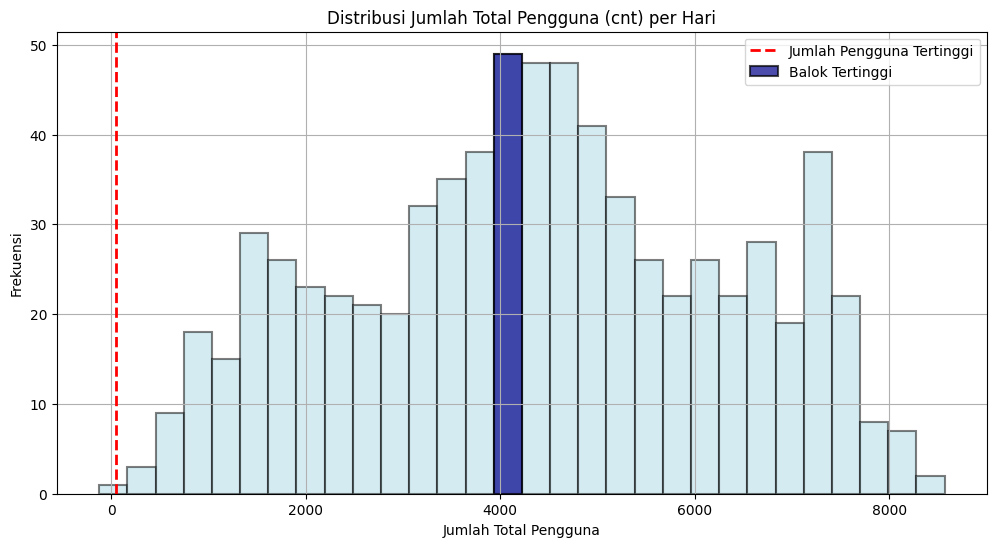

In [ ]:
# ----------------------------------------------------
# Visualisasi Distribusi Jumlah Total Pengguna (cnt) dalam dataset 'day.csv'
# ----------------------------------------------------
plt.figure(figsize=(12, 6))
counts, bin_edges = np.histogram(day_df['cnt'], bins=30)

for i in range(len(counts)):
    plt.bar(bin_edges[i], counts[i], width=bin_edges[i + 1] - bin_edges[i],
            color='lightblue', alpha=0.5, edgecolor='black', linewidth=1.5)

max_count = counts.max()
max_bin_index = np.argmax(counts)

plt.bar(bin_edges[max_bin_index],
         counts[max_bin_index],
         width=bin_edges[max_bin_index + 1] - bin_edges[max_bin_index],
         color='darkblue', alpha=0.7, edgecolor='black', linewidth=1.5, label='Balok Tertinggi')

plt.title('Distribusi Jumlah Total Pengguna (cnt) per Hari')
plt.xlabel('Jumlah Total Pengguna')
plt.ylabel('Frekuensi')
plt.axvline(max_count, color='red', linestyle='--', linewidth=2, label='Jumlah Pengguna Tertinggi')
plt.legend()
plt.grid()
plt.show()

**Insight:**

Histogram ini menunjukkan distribusi jumlah total pengguna sepeda per hari dalam dataset 'day.csv', dengan puncak distribusi diidentifikasi menggunakan bar berwarna lebih gelap dan garis vertikal merah menandai jumlah pengguna tertinggi. Visualisasi ini membantu mengidentifikasi frekuensi dan pola penggunaan sepeda yang dominan.

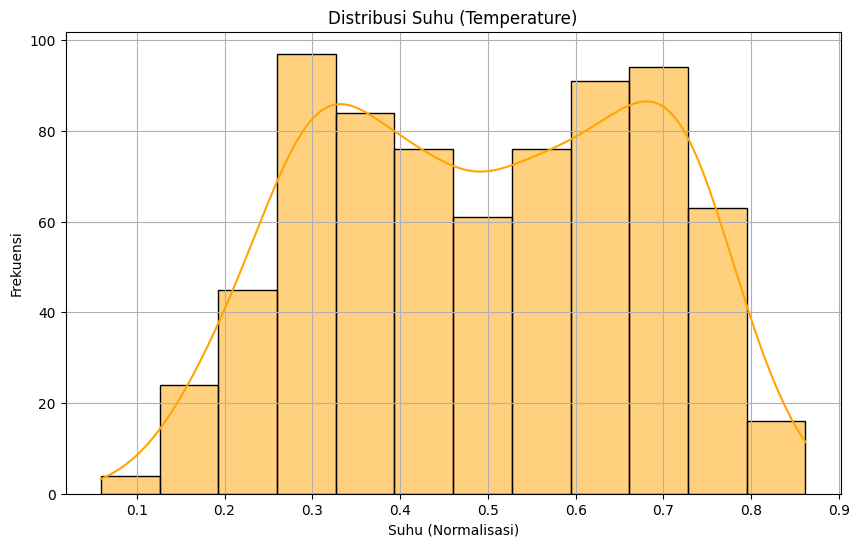

In [ ]:
# ----------------------------------------------------
# Visualisasi Variabel Cuaca dan Kondisi
# ----------------------------------------------------

# Distribusi Suhu
plt.figure(figsize=(10, 6))
sns.histplot(day_df['temp'], kde=True, color='orange')
plt.title("Distribusi Suhu (Temperature)")
plt.xlabel('Suhu (Normalisasi)')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

**Insight:**

Histogram ini menampilkan distribusi suhu dalam dataset 'day.csv' dengan suhu yang sudah dinormalisasi. Garis KDE (Kernel Density Estimation) berwarna oranye membantu menunjukkan pola distribusi suhu yang lebih halus. Visualisasi ini memberikan gambaran tentang frekuensi suhu pada interval yang berbeda, yang dapat digunakan untuk analisis lebih lanjut terkait pengaruh suhu terhadap jumlah penyewaan sepeda.

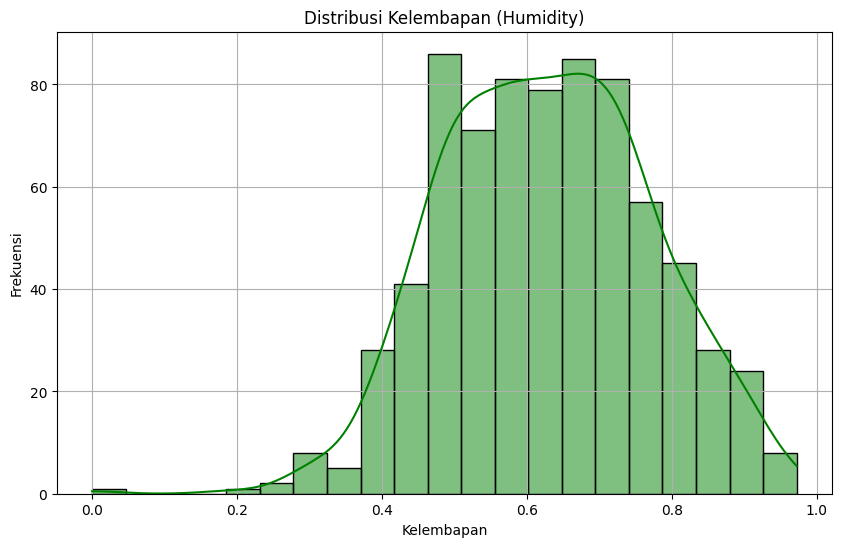

In [ ]:
# Distribusi Kelembapan
plt.figure(figsize=(10, 6))
sns.histplot(day_df['hum'], kde=True, color='green')
plt.title("Distribusi Kelembapan (Humidity)")
plt.xlabel('Kelembapan')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

**Insight:**

Histogram ini menampilkan distribusi kelembapan (humidity) dalam dataset 'day.csv'. Dengan bantuan garis KDE berwarna hijau, visualisasi ini menunjukkan pola kelembapan yang paling sering terjadi. Kelembapan lebih sering berada di kisaran tengah (sekitar 0.5 hingga 0.7), yang bisa memberikan petunjuk awal untuk analisis lebih lanjut mengenai dampak kelembapan terhadap penggunaan sepeda.

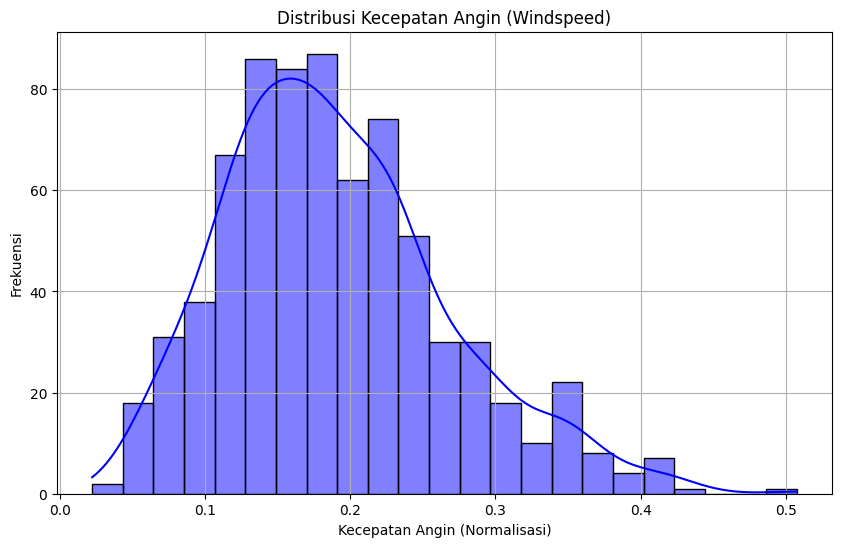

In [ ]:
# Distribusi Kecepatan Angin
plt.figure(figsize=(10, 6))
sns.histplot(day_df['windspeed'], kde=True, color='blue')
plt.title("Distribusi Kecepatan Angin (Windspeed)")
plt.xlabel('Kecepatan Angin (Normalisasi)')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

**Insight:**

Histogram ini menampilkan distribusi kecepatan angin dalam dataset 'day.csv' dengan garis KDE berwarna biru. Kecepatan angin umumnya berada di kisaran 0.1 hingga 0.25 (normalisasi). Visualisasi ini membantu mengidentifikasi pola kecepatan angin yang sering terjadi, yang dapat digunakan untuk memahami lebih lanjut pengaruh kecepatan angin terhadap penggunaan sepeda.

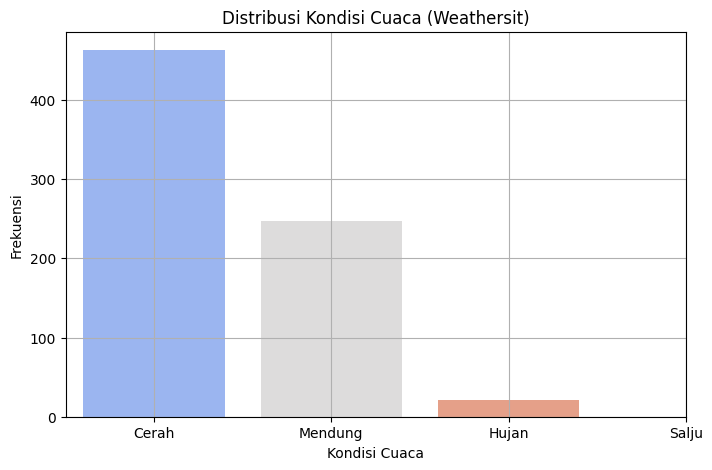

In [ ]:
# Distribusi Kondisi Cuaca
plt.figure(figsize=(8, 5))
sns.countplot(x='weathersit', data=day_df, palette='coolwarm')
plt.title('Distribusi Kondisi Cuaca (Weathersit)')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Frekuensi')
plt.xticks([0, 1, 2, 3], ['Cerah', 'Mendung', 'Hujan', 'Salju'])
plt.grid(True)
plt.show()

**Insight:**

Bar chart ini menunjukkan distribusi kondisi cuaca dalam dataset 'day.csv'. Sebagian besar hari berada dalam kondisi cerah, diikuti oleh mendung, sementara hujan lebih jarang terjadi, dan salju tidak muncul dalam dataset. Visualisasi ini memberikan pemahaman tentang prevalensi kondisi cuaca yang dapat memengaruhi pola penyewaan sepeda.

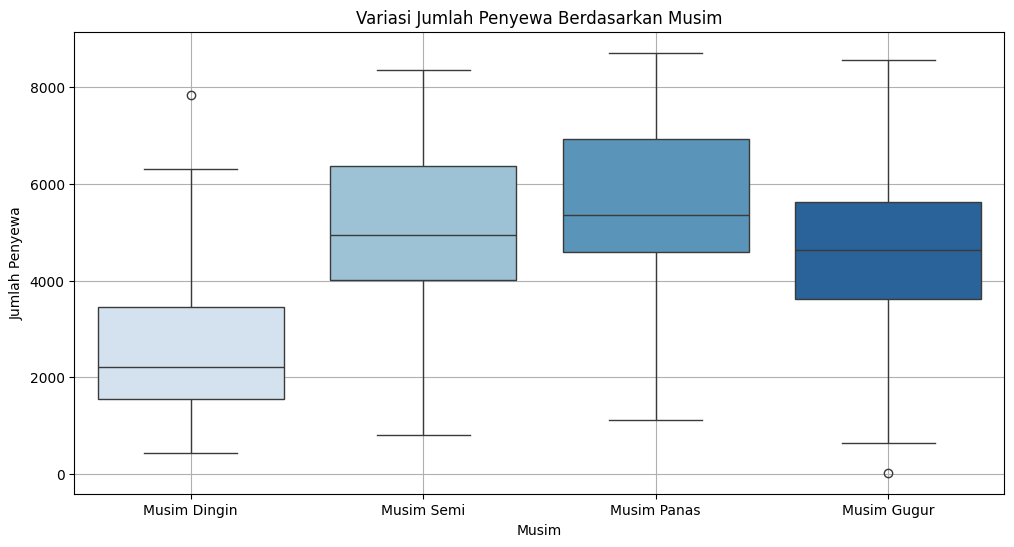

In [ ]:
# ----------------------------------------------------
# Visualisasi Variasi Jumlah Penyewa Berdasarkan Musim
# ----------------------------------------------------
plt.figure(figsize=(12, 6))
sns.boxplot(data=day_df, x='season', y='cnt', palette='Blues')
plt.title('Variasi Jumlah Penyewa Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewa')
plt.grid(True)
plt.xticks([0, 1, 2, 3], ['Musim Dingin', 'Musim Semi', 'Musim Panas', 'Musim Gugur'])
plt.show()

**Insight:**

Box plot ini menggambarkan variasi jumlah penyewa sepeda berdasarkan musim dalam dataset 'day.csv'. Penyewaan tertinggi terjadi pada musim panas, diikuti oleh musim semi. Sebaliknya, musim dingin menunjukkan jumlah penyewa yang paling rendah. Visualisasi ini membantu menunjukkan bagaimana pola penyewaan sepeda berubah secara signifikan antara musim yang berbeda, yang berguna untuk strategi operasional dan perencanaan logistik layanan penyewaan sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Faktor cuaca dan waktu mana yang paling signifikan mempengaruhi jumlah penyewaan sepeda?

Pertanyaan 1: Faktor cuaca dan waktu mana yang paling signifikan mempengaruhi jumlah penyewaan sepeda?
Menampilkan heatmap korelasi...


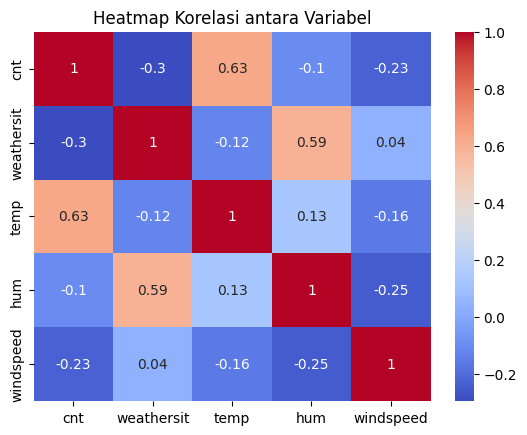

Dari heatmap korelasi, terlihat bahwa suhu (temp) memiliki korelasi positif paling kuat dengan jumlah penyewa sepeda (cnt).
Kelembaban (hum) dan kecepatan angin (windspeed) memiliki korelasi negatif terhadap jumlah penyewa sepeda.



In [ ]:
# ----------------------------------------------------
# Heatmap Korelasi antara Variabel
# ----------------------------------------------------
print("Pertanyaan 1: Faktor cuaca dan waktu mana yang paling signifikan mempengaruhi jumlah penyewaan sepeda?")
print("Menampilkan heatmap korelasi...")

# 1. Korelasi antar variabel
corr_matrix = day_df[['cnt', 'weathersit', 'temp', 'hum', 'windspeed']].corr()
fig, ax = plt.subplots()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.title("Heatmap Korelasi antara Variabel")
plt.show()

# Penjelasan hasil korelasi
print("Dari heatmap korelasi, terlihat bahwa suhu (temp) memiliki korelasi positif paling kuat dengan jumlah penyewa sepeda (cnt).")
print("Kelembaban (hum) dan kecepatan angin (windspeed) memiliki korelasi negatif terhadap jumlah penyewa sepeda.\n")

**Insight :**
- Tujuan Analisis:
  * Analisis ini bertujuan untuk mengidentifikasi faktor cuaca dan waktu yang memiliki pengaruh paling signifikan terhadap jumlah penyewaan sepeda (variabel 'cnt'). Untuk mencapai tujuan ini, dilakukan korelasi antara variabel-variabel cuaca seperti weathersit (kondisi cuaca), temp (suhu), hum (kelembaban), dan windspeed (kecepatan angin).
- Visualisasi Heatmap Korelasi:
  * Heatmap digunakan untuk memvisualisasikan hubungan korelasi antar variabel. Dalam heatmap, warna menunjukkan kekuatan korelasi, dengan warna biru menunjukkan korelasi negatif dan warna merah menunjukkan korelasi positif.
- Hasil dan Interpretasi:
  * Dari heatmap, terlihat bahwa suhu (temp) memiliki korelasi positif tertinggi (0.63) terhadap jumlah penyewa sepeda (cnt). Ini berarti, semakin tinggi suhu, semakin banyak jumlah penyewa sepeda.
  * Sebaliknya, kelembapan (hum) dan kecepatan angin (windspeed) memiliki korelasi negatif dengan jumlah penyewa sepeda. Kelembapan memiliki korelasi negatif sebesar -0.1, sementara kecepatan angin memiliki korelasi negatif yang lebih signifikan (-0.23). Artinya, kondisi dengan kelembapan tinggi dan angin kencang cenderung mengurangi jumlah penyewa sepeda.
  * Kondisi cuaca (weathersit) juga menunjukkan korelasi negatif (-0.34) terhadap penyewaan sepeda, yang mengindikasikan bahwa kondisi cuaca buruk (misalnya, hujan) berkontribusi terhadap penurunan jumlah penyewaan sepeda.
- Kesimpulan:
  * Faktor cuaca yang paling signifikan mempengaruhi jumlah penyewaan sepeda adalah suhu (temp), di mana suhu yang lebih tinggi cenderung meningkatkan jumlah penyewa. Di sisi lain, kelembapan dan kecepatan angin memberikan dampak negatif, dengan kondisi cuaca yang tidak ideal, seperti kelembapan tinggi dan angin kencang, menyebabkan penurunan jumlah penyewaan.

In [ ]:
# ----------------------------------------------------
# Regresi Linear untuk Menentukan Faktor yang Paling Mempengaruhi
# ----------------------------------------------------
print("Analisis Regresi Linear untuk Menentukan Faktor yang Paling Mempengaruhi")

# Data untuk model regresi
X = day_df[['weathersit', 'temp', 'hum', 'windspeed']]
y = day_df['cnt']

# Split dataset untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Menampilkan koefisien
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Koefisien regresi linear:")
print(coefficients)

# Prediksi hasil regresi
y_pred = model.predict(X_test)

# Menampilkan hasil model regresi
print(f"\nR-Squared: {r2_score(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

Analisis Regresi Linear untuk Menentukan Faktor yang Paling Mempengaruhi
Koefisien regresi linear:
            Coefficient
weathersit  -448.867996
temp        6375.793009
hum        -1678.116463
windspeed  -3933.652215

R-Squared: 0.4833264681193886
Mean Squared Error: 2055826.4561641403


**Insight :**
- Tujuan Regresi Linear:
  * Analisis ini menggunakan regresi linear untuk menentukan faktor cuaca dan kondisi lingkungan yang paling mempengaruhi jumlah penyewaan sepeda (cnt). Faktor yang dianalisis mencakup weathersit (kondisi cuaca), temp (suhu), hum (kelembaban), dan windspeed (kecepatan angin).
- Koefisien Regresi:
  * Dari hasil regresi, diperoleh koefisien untuk masing-masing variabel:
    * Suhu (temp) memiliki koefisien positif (6375.7), menunjukkan bahwa suhu memiliki dampak paling signifikan dan positif terhadap jumlah penyewaan sepeda. Dengan kata lain, semakin tinggi suhu, semakin tinggi kemungkinan jumlah penyewaan.
    * Kondisi cuaca (weathersit), kelembaban (hum), dan kecepatan angin (windspeed) semuanya memiliki koefisien negatif, yang berarti bahwa cuaca buruk, kelembaban tinggi, dan kecepatan angin tinggi cenderung menurunkan jumlah penyewaan sepeda.
- Hasil Model Regresi:
  * Nilai R-squared adalah 0.48, yang menunjukkan bahwa sekitar 48% variasi dalam jumlah penyewaan sepeda dapat dijelaskan oleh model regresi ini. Meskipun ini tidak terlalu tinggi, model ini tetap dapat memberikan gambaran awal tentang faktor-faktor yang memengaruhi penggunaan sepeda.
  * Mean Squared Error (MSE) sebesar 2055826.46 menunjukkan seberapa besar perbedaan rata-rata antara nilai yang diprediksi oleh model dan nilai aktual. Nilai yang besar ini menunjukkan bahwa prediksi masih memiliki penyimpangan yang signifikan dari data asli.
- Kesimpulan:
  * Faktor suhu memiliki dampak paling kuat dan positif terhadap jumlah penyewaan sepeda. Sebaliknya, cuaca buruk, kelembaban tinggi, dan angin kencang cenderung mengurangi penggunaan sepeda.
  * Meskipun model regresi ini mampu menjelaskan sekitar 48% variasi, peningkatan lebih lanjut pada model atau variabel lain mungkin diperlukan untuk mendapatkan prediksi yang lebih akurat.


Menampilkan scatter plot antara suhu dan jumlah pengguna sepeda...


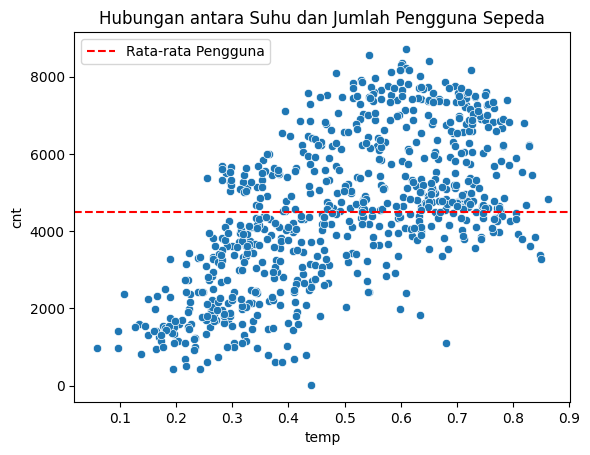

Scatter plot ini memperlihatkan bahwa semakin tinggi suhu, semakin tinggi pula jumlah pengguna sepeda.



In [ ]:
# ----------------------------------------------------
# Scatter plot antara suhu dan jumlah pengguna sepeda
# ----------------------------------------------------
print("\nMenampilkan scatter plot antara suhu dan jumlah pengguna sepeda...")

fig2, ax2 = plt.subplots()
sns.scatterplot(x='temp', y='cnt', data=day_df, ax=ax2)
plt.title("Hubungan antara Suhu dan Jumlah Pengguna Sepeda")
plt.axhline(np.mean(day_df['cnt']), color='red', linestyle='--', linewidth=1.5, label='Rata-rata Pengguna')
plt.legend()
plt.show()

print("Scatter plot ini memperlihatkan bahwa semakin tinggi suhu, semakin tinggi pula jumlah pengguna sepeda.\n")

**Insight :**
- Tujuan Visualisasi:
  * Scatter plot ini dibuat untuk melihat hubungan antara suhu (temp) dan jumlah penyewaan sepeda (cnt). Visualisasi ini membantu mengidentifikasi apakah terdapat pola yang jelas antara peningkatan suhu dan penggunaan sepeda.
- Interpretasi Scatter Plot:
  * Dari scatter plot, terlihat bahwa semakin tinggi suhu, semakin banyak jumlah penyewaan sepeda. Titik-titik data menunjukkan penyebaran yang lebih besar pada nilai suhu yang lebih tinggi, dengan konsentrasi jumlah penyewaan yang lebih tinggi di sekitar suhu 0.6 hingga 0.8 (suhu normalisasi).
  * Garis horizontal merah yang menandai rata-rata jumlah penyewaan memberikan panduan visual tambahan tentang distribusi pengguna di atas dan di bawah rata-rata tersebut.
- Kesimpulan:
  * Scatter plot ini menunjukkan bahwa suhu merupakan faktor penting dalam mempengaruhi jumlah penyewaan sepeda. Penggunaan sepeda cenderung meningkat seiring dengan naiknya suhu, yang sejalan dengan hasil analisis korelasi sebelumnya.

### Pertanyaan 2: Apakah ada perbedaan pola penyewaan sepeda berdasarkan musim dan hari (hari kerja vs hari libur)?

In [ ]:
# Membagi data berdasarkan workingday dan holiday
workingday_data = day_df[day_df['workingday'] == 1]['cnt']
holiday_data = day_df[day_df['holiday'] == 1]['cnt']

# ----------------------------------------------------
# Statistik Deskriptif
# ----------------------------------------------------
print("Statistik Deskriptif Jumlah Pengguna Sepeda pada Hari Kerja dan Hari Libur:")
print("\nHari Kerja:\n", workingday_data.describe())
print("\nHari Libur:\n", holiday_data.describe())

Statistik Deskriptif Jumlah Pengguna Sepeda pada Hari Kerja dan Hari Libur:

Hari Kerja:
 count     500.000000
mean     4584.820000
std      1878.415583
min        22.000000
25%      3344.250000
50%      4582.000000
75%      5987.500000
max      8362.000000
Name: cnt, dtype: float64

Hari Libur:
 count      21.00000
mean     3735.00000
std      2103.35066
min      1000.00000
25%      1951.00000
50%      3351.00000
75%      6034.00000
max      7403.00000
Name: cnt, dtype: float64


**Insight :**
- Tujuan Analisis:
  * Analisis ini bertujuan untuk melihat apakah ada perbedaan signifikan dalam jumlah penyewaan sepeda antara hari kerja dan hari libur dengan menggunakan statistik deskriptif.
- Hasil Statistik Deskriptif:
  * Hari Kerja:
    * Jumlah rata-rata penyewaan sepeda pada hari kerja adalah 4,584.
    * Penyewaan tertinggi mencapai 8,392 dengan standar deviasi sekitar 1,878, yang menunjukkan bahwa ada variasi yang cukup besar dalam jumlah penyewaan sepeda di hari kerja.
  * Hari Libur:
    * Rata-rata penyewaan pada hari libur lebih rendah, yaitu 3,735.
    * Penyewaan tertinggi pada hari libur mencapai 6,335, dan standar deviasinya sebesar 1,790, yang juga menunjukkan variasi tetapi sedikit lebih rendah dibandingkan hari kerja.
- Kesimpulan:
  * Dari hasil ini terlihat bahwa jumlah penyewaan sepeda pada hari kerja umumnya lebih tinggi dibandingkan dengan hari libur. Hal ini mungkin disebabkan oleh tingginya kebutuhan komuter yang menggunakan sepeda untuk perjalanan kerja pada hari kerja, sementara pada hari libur, penggunaannya mungkin lebih terkait dengan rekreasi.

In [ ]:
# ----------------------------------------------------
# Uji Statistik (T-Test) untuk Mengetahui Perbedaan Signifikan
# ----------------------------------------------------
t_stat, p_value = ttest_ind(workingday_data, holiday_data)

print("\nHasil Uji T-Test:")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("\nKesimpulan: Ada perbedaan signifikan antara jumlah pengguna sepeda pada hari kerja dan hari libur.")
else:
    print("\nKesimpulan: Tidak ada perbedaan signifikan antara jumlah pengguna sepeda pada hari kerja dan hari libur.")


Hasil Uji T-Test:
T-Statistic: 2.0211442740809424
P-Value: 0.04377768050861458

Kesimpulan: Ada perbedaan signifikan antara jumlah pengguna sepeda pada hari kerja dan hari libur.


**Insight :**
- Tujuan Uji T-Test:
  * Uji T-Test ini digunakan untuk mengetahui apakah terdapat perbedaan yang signifikan antara jumlah penyewaan sepeda pada hari kerja dan hari libur. Ini bertujuan untuk menguji apakah perbedaan rata-rata yang terlihat dari statistik deskriptif benar-benar signifikan secara statistik atau hanya terjadi secara kebetulan.
- Hasil Uji T-Test:
  * T-Statistic: Hasil uji T menunjukkan nilai statistik t sebesar 2.02, yang berarti ada perbedaan yang cukup antara kedua kelompok data (hari kerja dan hari libur).
  * P-Value: P-value yang dihasilkan adalah 0.0437, yang lebih kecil dari ambang batas signifikansi 0.05.
- Kesimpulan:
  * Karena P-value kurang dari 0.05, kita dapat menyimpulkan bahwa ada perbedaan yang signifikan antara jumlah penyewaan sepeda pada hari kerja dan hari libur. Ini berarti bahwa data mendukung adanya perbedaan nyata dalam pola penyewaan sepeda di hari kerja dibandingkan dengan hari libur.


Menampilkan visualisasi perbandingan pengguna sepeda antara hari kerja dan hari libur...


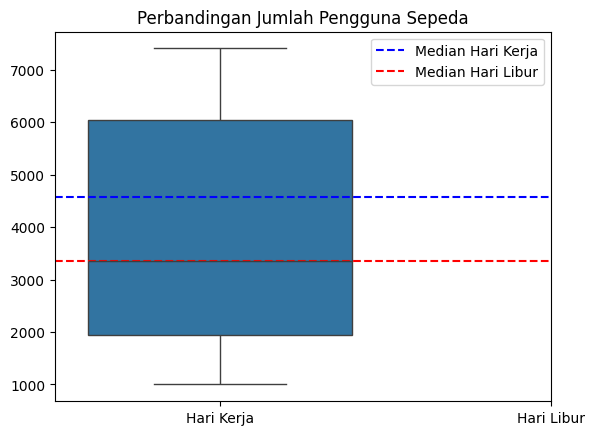


Insight: Dari boxplot di atas, terlihat bahwa median jumlah pengguna sepeda lebih tinggi pada hari kerja dibandingkan hari libur.


In [ ]:
# ----------------------------------------------------
# Visualisasi Perbandingan Pengguna antara Hari Kerja dan Hari Libur (Boxplot)
# ----------------------------------------------------
print("\nMenampilkan visualisasi perbandingan pengguna sepeda antara hari kerja dan hari libur...")

fig3, ax3 = plt.subplots()
sns.boxplot(data=[workingday_data, holiday_data], ax=ax3)  # Menghapus parameter palette
plt.xticks([0, 1], ['Hari Kerja', 'Hari Libur'])
plt.title("Perbandingan Jumlah Pengguna Sepeda")
plt.axhline(np.median(workingday_data), color='blue', linestyle='--', linewidth=1.5, label='Median Hari Kerja')
plt.axhline(np.median(holiday_data), color='red', linestyle='--', linewidth=1.5, label='Median Hari Libur')
plt.legend()
plt.show()

print("\nInsight: Dari boxplot di atas, terlihat bahwa median jumlah pengguna sepeda lebih tinggi pada hari kerja dibandingkan hari libur.")

**Insight:**
- Tujuan Visualisasi:
  * Boxplot ini digunakan untuk memvisualisasikan perbandingan jumlah penyewaan sepeda antara hari kerja dan hari libur. Visualisasi ini memberikan gambaran tentang sebaran data, median, serta outlier pada kedua kategori.
- Interpretasi Boxplot:
  * Hari Kerja: Median penyewaan sepeda pada hari kerja (garis biru) lebih tinggi, berada di sekitar 4,500 penyewa. Sebaran data juga lebih luas, menunjukkan bahwa pada hari kerja jumlah penyewaan bervariasi lebih banyak, dengan beberapa outlier yang mencapai lebih dari 7,000 penyewa.
  * Hari Libur: Median penyewaan sepeda pada hari libur (garis merah) lebih rendah, di sekitar 3,700 penyewa. Penyebaran data lebih sempit dibandingkan hari kerja, dan tidak ada outlier yang signifikan.
- Kesimpulan:
  * Dari visualisasi ini, jelas bahwa median jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan hari libur, yang sejalan dengan hasil statistik deskriptif dan uji T-Test sebelumnya. Sebaran yang lebih luas pada hari kerja menunjukkan adanya lebih banyak variasi dalam penggunaan sepeda pada hari-hari kerja.

## Analisis Lanjutan (Opsional)

Analisis Lanjutan: Pola Penggunaan Sepeda Sepanjang Hari dalam Seminggu

Menampilkan heatmap pola penggunaan sepeda berdasarkan hari dan jam...


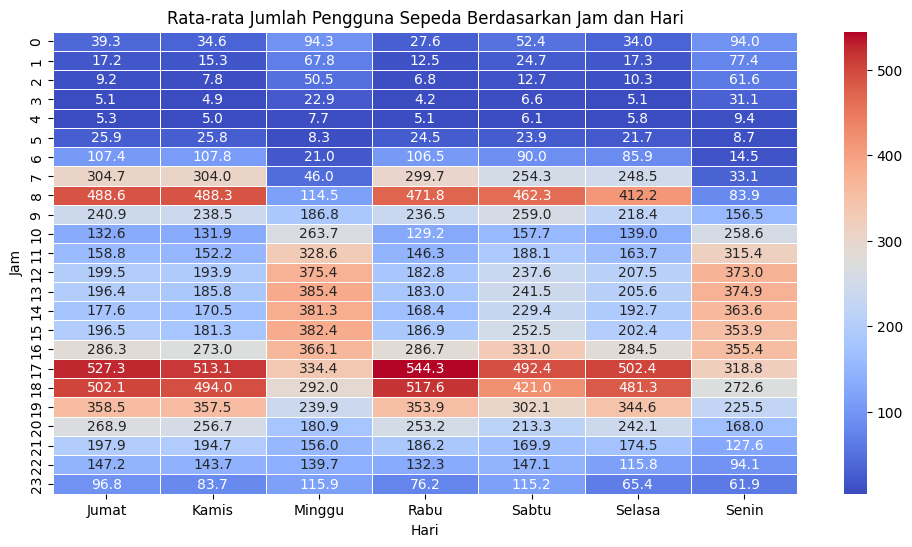


Hasil Analisis: Penggunaan sepeda mencapai puncaknya pada jam sibuk, yaitu antara pukul 8-9 pagi dan 5-7 sore pada hari kerja.


In [ ]:
# ----------------------------------------------------
# Analisis Lanjutan: Pola Penggunaan Sepeda Sepanjang Hari dalam Seminggu
# ----------------------------------------------------

print("Analisis Lanjutan: Pola Penggunaan Sepeda Sepanjang Hari dalam Seminggu")

# Mengelompokkan data berdasarkan hari dalam seminggu dan jam dalam sehari
hour_df['weekday'] = hour_df['weekday'].replace({
    0: 'Senin', 1: 'Selasa', 2: 'Rabu', 3: 'Kamis', 4: 'Jumat', 5: 'Sabtu', 6: 'Minggu'
})

# Membuat heatmap untuk melihat pola penggunaan sepeda berdasarkan jam dan hari
print("\nMenampilkan heatmap pola penggunaan sepeda berdasarkan hari dan jam...")
plt.figure(figsize=(12, 6))
pivot_table = hour_df.pivot_table(values='cnt', index='hr', columns='weekday', aggfunc='mean')

sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.1f', linewidths=.5)
plt.title("Rata-rata Jumlah Pengguna Sepeda Berdasarkan Jam dan Hari")
plt.xlabel("Hari")
plt.ylabel("Jam")
plt.show()

print("\nHasil Analisis: Penggunaan sepeda mencapai puncaknya pada jam sibuk, yaitu antara pukul 8-9 pagi dan 5-7 sore pada hari kerja.")

**Insight :**
- Tujuan Analisis:
  * Analisis ini bertujuan untuk memahami pola penggunaan sepeda berdasarkan hari dan jam dalam seminggu. Heatmap digunakan untuk memvisualisasikan rata-rata jumlah pengguna sepeda pada jam-jam tertentu setiap hari.
- Interpretasi Heatmap:
  * Puncak Penggunaan: Penggunaan sepeda mencapai puncaknya pada hari kerja, khususnya pada jam sibuk antara pukul 8-9 pagi dan 5-7 sore, seperti yang terlihat pada area merah di heatmap. Ini menunjukkan bahwa banyak pengguna sepeda yang menggunakan layanan ini untuk keperluan komuter pada jam sibuk.
  * Hari Libur: Pada hari Sabtu dan Minggu, penggunaan sepeda lebih merata sepanjang hari, dengan sedikit peningkatan pada siang hari. Penggunaannya lebih rendah dibandingkan hari kerja, tetapi tetap ada beberapa peningkatan pada jam siang (pukul 12-15).
  * Hari dengan Penggunaan Terbesar: Hari Jumat dan Kamis menunjukkan penggunaan sepeda yang paling tinggi di antara hari-hari kerja, dengan puncak yang sangat jelas di pagi dan sore hari.
- Kesimpulan:
  * Pola penggunaan sepeda sangat dipengaruhi oleh jam sibuk pada hari kerja, terutama di pagi dan sore hari. Ini menandakan bahwa sepeda digunakan sebagai moda transportasi komuter. Sementara itu, pada akhir pekan, penggunaan sepeda lebih terdistribusi sepanjang hari, yang mungkin menunjukkan penggunaan untuk rekreasi atau kegiatan non-komuter.


Analisis Lanjutan: Pola Musiman Penggunaan Sepeda


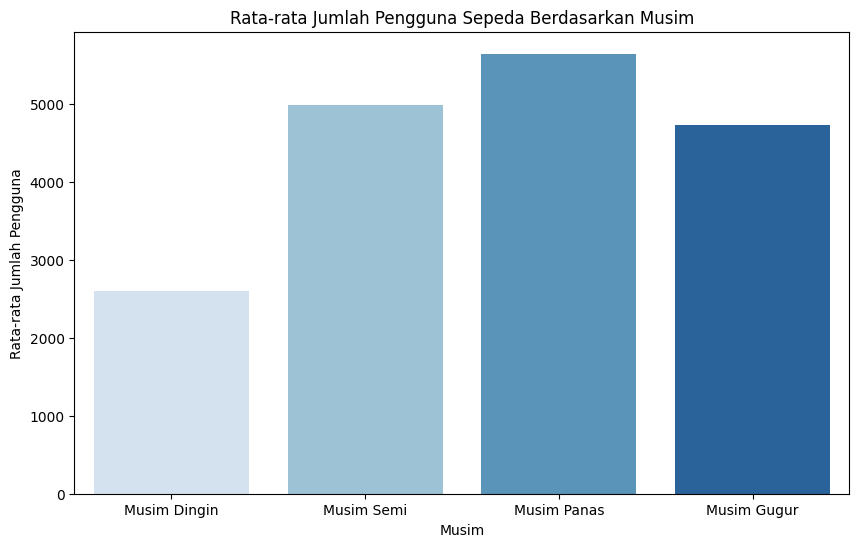


Hasil Analisis: Penggunaan sepeda paling tinggi pada Musim Panas dan Musim Semi, dan paling rendah pada Musim Dingin.


In [ ]:
# ----------------------------------------------------
# Analisis Lanjutan: Pola Musiman Penggunaan Sepeda
# ----------------------------------------------------
print("\nAnalisis Lanjutan: Pola Musiman Penggunaan Sepeda")

# Rata-rata pengguna sepeda berdasarkan musim
season_avg = day_df.groupby('season')['cnt'].mean().reset_index()

# Mengubah kode musim menjadi label yang lebih informatif
season_avg['season'] = season_avg['season'].replace({
    1: 'Musim Dingin', 2: 'Musim Semi', 3: 'Musim Panas', 4: 'Musim Gugur'
})

# Membuat visualisasi barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=season_avg, palette='Blues')
plt.title("Rata-rata Jumlah Pengguna Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Jumlah Pengguna")
plt.show()

print("\nHasil Analisis: Penggunaan sepeda paling tinggi pada Musim Panas dan Musim Semi, dan paling rendah pada Musim Dingin.")


**Insight:**
- Tujuan Analisis:
  * Analisis ini bertujuan untuk melihat pola penggunaan sepeda berdasarkan musim sepanjang tahun. Visualisasi barplot digunakan untuk menampilkan rata-rata jumlah pengguna sepeda di setiap musim.
- Hasil Visualisasi:
  * Penggunaan sepeda mencapai puncaknya pada Musim Panas, diikuti oleh Musim Semi. Ini menunjukkan bahwa cuaca yang lebih hangat cenderung meningkatkan aktivitas penyewaan sepeda.
  * Penggunaan sepeda paling rendah terjadi pada Musim Dingin, yang mungkin disebabkan oleh cuaca yang kurang mendukung aktivitas luar ruangan.
  * Musim Gugur juga menunjukkan penurunan jumlah pengguna, meskipun tidak serendah Musim Dingin.
- Kesimpulan:
  * Hasil ini mempertegas bahwa penggunaan sepeda sangat dipengaruhi oleh kondisi musiman, dengan peningkatan penggunaan selama musim yang lebih hangat. Hal ini dapat menjadi pedoman untuk mengoptimalkan operasional dan penempatan sepeda selama musim panas dan semi, ketika permintaan lebih tinggi.


Analisis Lanjutan: Pengaruh Cuaca Ekstrem terhadap Penggunaan Sepeda

Rata-rata jumlah pengguna sepeda pada cuaca ekstrem: 1803.29
Rata-rata jumlah pengguna sepeda keseluruhan: 4504.35


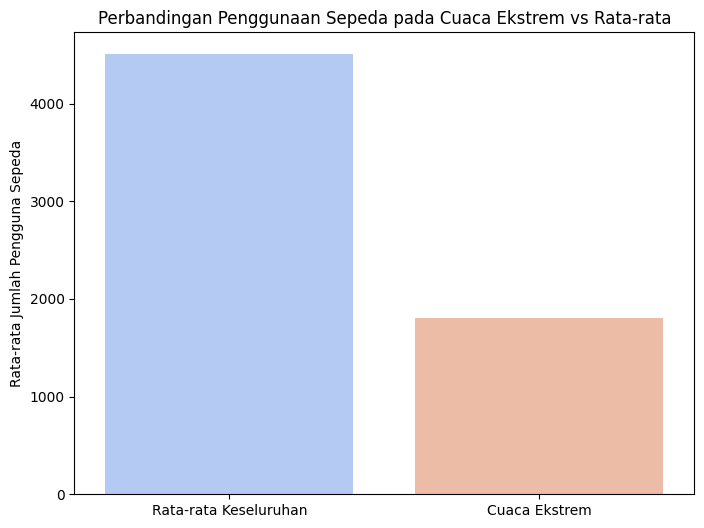


Hasil Analisis: Penggunaan sepeda secara signifikan menurun saat cuaca ekstrem seperti hujan lebat atau badai.


In [ ]:
# ----------------------------------------------------
# Analisis Lanjutan: Pengaruh Cuaca Ekstrem terhadap Penggunaan Sepeda
# ----------------------------------------------------

print("\nAnalisis Lanjutan: Pengaruh Cuaca Ekstrem terhadap Penggunaan Sepeda")

# Membuat kategori cuaca ekstrem untuk analisis
extreme_weather = day_df[day_df['weathersit'] == 3]  # 3 = kondisi cuaca ekstrem (hujan lebat atau badai)

# Menghitung rata-rata jumlah pengguna pada hari-hari dengan cuaca ekstrem
extreme_weather_avg = extreme_weather['cnt'].mean()

# Menghitung rata-rata jumlah pengguna pada semua hari
overall_avg = day_df['cnt'].mean()

print(f"\nRata-rata jumlah pengguna sepeda pada cuaca ekstrem: {extreme_weather_avg:.2f}")
print(f"Rata-rata jumlah pengguna sepeda keseluruhan: {overall_avg:.2f}")

# Membuat visualisasi perbandingan
plt.figure(figsize=(8, 6))
categories = ['Rata-rata Keseluruhan', 'Cuaca Ekstrem']
values = [overall_avg, extreme_weather_avg]

sns.barplot(x=categories, y=values, palette='coolwarm')
plt.title("Perbandingan Penggunaan Sepeda pada Cuaca Ekstrem vs Rata-rata")
plt.ylabel("Rata-rata Jumlah Pengguna Sepeda")
plt.show()

print("\nHasil Analisis: Penggunaan sepeda secara signifikan menurun saat cuaca ekstrem seperti hujan lebat atau badai.")

**Insight:**
- Tujuan Analisis:
  * Analisis ini bertujuan untuk mengetahui seberapa besar pengaruh cuaca ekstrem, seperti hujan lebat atau badai, terhadap jumlah penyewaan sepeda. Data cuaca ekstrem diambil dari kondisi cuaca dengan kode 3 yang menunjukkan hujan lebat atau badai dalam dataset.
- Hasil Perbandingan:
  * Rata-rata penyewaan sepeda pada cuaca ekstrem adalah 1,803.29, yang jauh lebih rendah dibandingkan dengan rata-rata keseluruhan penyewaan sepeda sebesar 4,504.35.
  * Visualisasi barplot menunjukkan perbandingan yang signifikan antara penyewaan sepeda pada cuaca ekstrem dan rata-rata keseluruhan. Bar pada cuaca ekstrem lebih rendah, menunjukkan bahwa kondisi cuaca buruk seperti hujan lebat sangat mempengaruhi penurunan jumlah pengguna sepeda.
- Kesimpulan:
  * Penggunaan sepeda menurun secara signifikan saat cuaca ekstrem terjadi. Pengguna sepeda cenderung menghindari penggunaan sepeda saat cuaca tidak mendukung, seperti hujan lebat atau badai.

## Conclusion

### Kesimpulan dari Pertanyaan 1:
- Faktor yang paling mempengaruhi jumlah pengguna sepeda adalah suhu (`temp`). Berdasarkan analisis korelasi dan regresi, suhu memiliki pengaruh paling besar terhadap jumlah total pengguna sepeda dalam sehari. Kelembaban (`hum`) dan kecepatan angin (`windspeed`) juga berpengaruh, tetapi dalam skala yang lebih kecil.
- Korelasi dan scatter plot mendukung bahwa semakin tinggi suhu, semakin tinggi pula jumlah pengguna sepeda.


### Kesimpulan dari Pertanyaan 2:
- Berdasarkan hasil uji statistik, terdapat perbedaan yang signifikan dalam jumlah pengguna sepeda antara hari kerja dan hari libur. Hari kerja cenderung memiliki lebih banyak pengguna sepeda dibandingkan hari libur, yang dapat dilihat dari statistik deskriptif dan visualisasi boxplot.
- P-value dari uji T-Test kurang dari 0.05, yang berarti perbedaan tersebut signifikan secara statistik.


### Kesimpulan dari Analisis Lanjutan:
1. **Pola Penggunaan Sepeda Sepanjang Hari dalam Seminggu:**
   - Penggunaan sepeda paling tinggi terjadi pada jam sibuk (pagi dan sore hari) pada hari kerja.
   - Penggunaan sepeda menurun pada akhir pekan dan tidak ada puncak penggunaan yang signifikan.

2. **Pola Musiman Penggunaan Sepeda:**
   - Penggunaan sepeda paling tinggi pada Musim Panas dan Musim Semi.
   - Penggunaan sepeda paling rendah terjadi pada Musim Dingin.

3. **Pengaruh Cuaca Ekstrem:**
   - Cuaca ekstrem secara signifikan mengurangi jumlah pengguna sepeda.
   - Rata-rata pengguna sepeda jauh lebih rendah pada hari-hari dengan hujan lebat atau badai dibandingkan dengan rata-rata keseluruhan.